In [2]:
pwd

'/Users/vishalbarad/Desktop/Python/ML/clustring/GMM'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/Users/vishalbarad/Desktop/Python/ML/clustring/GMM/Clustering_gmm.csv")

In [5]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


Text(0, 0.5, 'Height')

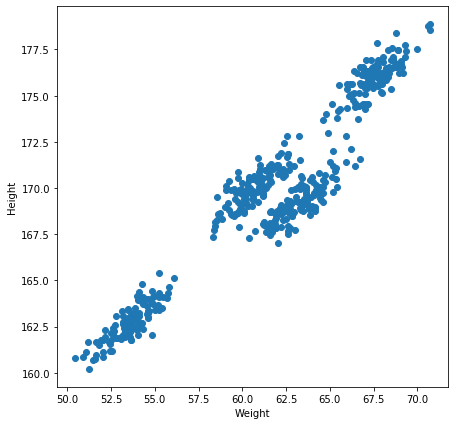

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

### That’s what our data looks like. Let’s build a k-means model on this data first:

In [9]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=4)

In [14]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
kpred = kmeans.predict(df)

In [16]:
df['cluster'] = kpred

In [17]:
df.head()

,Weight,Height,cluster
0,67.062924,176.086355,2
1,68.804094,178.388669,2
2,60.930863,170.284496,3
3,59.733843,168.691992,3
4,65.431230,173.763679,2


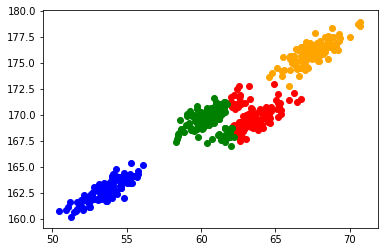

In [21]:
color=['red','blue','orange','green']
for i in range(0,4):
    data = df[df['cluster']==i]
    plt.scatter(data['Weight'],data['Height'],color=color[i])
plt.show()

That’s not quite right. The k-means model failed to identify the right clusters. Look closely at the clusters in the center – k-means has tried to build a circular cluster even though the data distribution is elliptical (remember the drawbacks we discussed earlier?).

### Let’s now build a Gaussian Mixture Model on the same data and see if we can improve on k-means:

In [22]:
from sklearn.mixture import GaussianMixture

In [31]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [32]:
model = GaussianMixture(n_components=4)

In [33]:
model.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [35]:
gpred = model.predict(df)
df['cluster'] = gpred

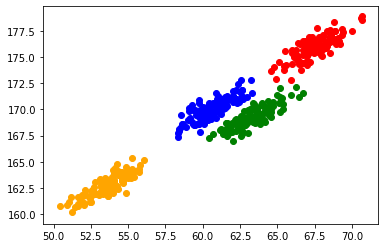

In [36]:
color=['red','blue','orange','green']
for i in range(0,4):
    data = df[df['cluster']==i]
    plt.scatter(data['Weight'],data['Height'],color=color[i])
plt.show()

## Excellent! Those are exactly the clusters we were hoping for. Gaussian Mixture Models have blown k-means out of the water here.